In [75]:
import torch
from torch import nn

In [76]:
# agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [77]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [78]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [79]:

# Building Model

class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(in_features=1,out_features=1,device=device)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear(x)
        

In [80]:
model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([[-0.1214]], requires_grad=True),
 Parameter containing:
 tensor([-0.6089], requires_grad=True)]

In [81]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

In [82]:
epochs = 169

In [83]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model.parameters()).device

device(type='cpu')

training and testing

In [84]:

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    ##TRAINING
    
    # setting in training mode
    model.train()
    
    #forword pass
    y_pred = model(X_train)
    
    #calculate loss
    loss = loss_fn(y_pred, y_train)
    
    #zero grad optimizer
    optimizer.zero_grad
    
    #backpropgation
    loss.backward()
    
    #optimizer update to new gradients
    optimizer.step()

    ## TESTING
    
    # setting model on evalution mode
    model.eval()
    
    #with inferece_mode or no_grad
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred , y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
        
    
    

Epoch: 0 | Train loss: 1.2291958332061768 | Test loss: 1.638525366783142
Epoch: 10 | Train loss: 1.1658302545547485 | Test loss: 1.5509638786315918
Epoch: 20 | Train loss: 0.9872547388076782 | Test loss: 1.3286924362182617
Epoch: 30 | Train loss: 0.6934691667556763 | Test loss: 0.9717109799385071
Epoch: 40 | Train loss: 0.28447359800338745 | Test loss: 0.4800192713737488
Epoch: 50 | Train loss: 0.21491357684135437 | Test loss: 0.10653200000524521
Epoch: 60 | Train loss: 0.6404908299446106 | Test loss: 0.5943782329559326
Epoch: 70 | Train loss: 0.9508581161499023 | Test loss: 0.947514533996582
Epoch: 80 | Train loss: 1.1460152864456177 | Test loss: 1.1659406423568726
Epoch: 90 | Train loss: 1.2259624004364014 | Test loss: 1.2496570348739624
Epoch: 100 | Train loss: 1.190699815750122 | Test loss: 1.1986632347106934
Epoch: 110 | Train loss: 1.040226936340332 | Test loss: 1.0129594802856445
Epoch: 120 | Train loss: 0.7745441198348999 | Test loss: 0.6925455927848816
Epoch: 130 | Train loss:

Text(0, 0.5, 'Loss')

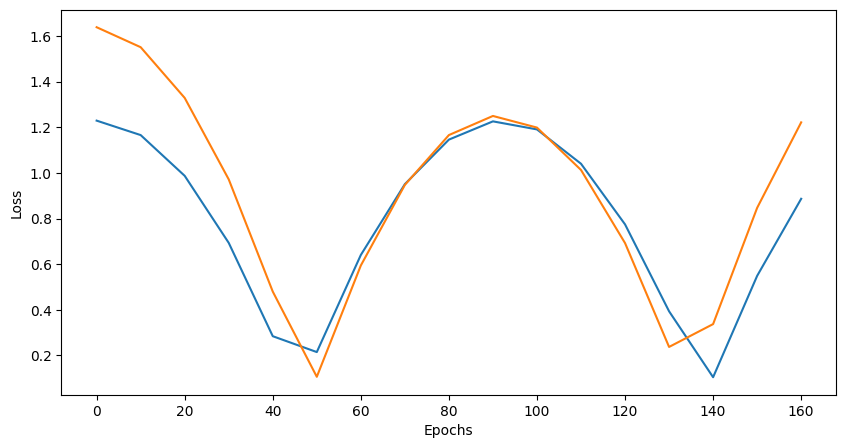

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## 🤣🤣🤣